In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("Social_Network_Ads.csv")

In [77]:
df.isna().sum().sum()

0

In [78]:
# convert categorical data to numerical data for Gender column in df 

df['Gender'].replace(['Male','Female'],[0,1],inplace=True)



In [79]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [80]:
df.drop(['User ID'],axis=1,inplace=True)

In [81]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


c:\Users\sagar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

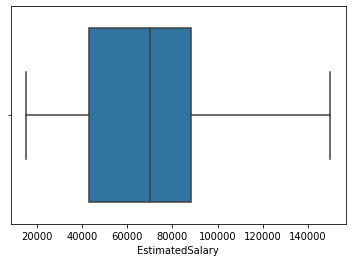

In [82]:
sns.boxplot(df.EstimatedSalary)

c:\Users\sagar\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

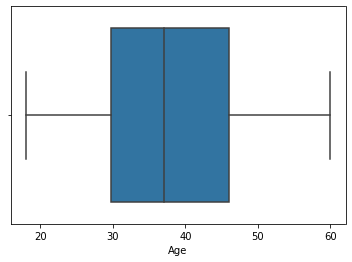

In [83]:
sns.boxplot(df.Age)

In [84]:
#TODO Check if feature scaling is required or not 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range   = (0,1))
df[["Age","EstimatedSalary"]] = min_max_scaler.fit_transform(df[['Age','EstimatedSalary']])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,0.023810,0.029630,0
1,0,0.404762,0.037037,0
2,1,0.190476,0.207407,0
3,1,0.214286,0.311111,0
4,0,0.023810,0.451852,0


In [85]:
y = df['Purchased']
x = df.drop(['Purchased'],axis=1)



,Gender,Age,EstimatedSalary
0,0,0.023810,0.029630
1,0,0.404762,0.037037
2,1,0.190476,0.207407
3,1,0.214286,0.311111
4,0,0.023810,0.451852


In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Precision Score:  1.0
Accuracy Score:  0.925
[[58  0]
 [ 6 16]]


<AxesSubplot:>

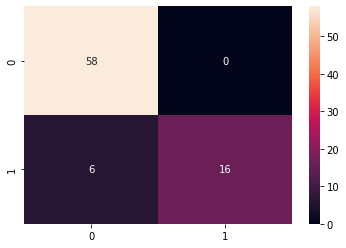

In [87]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

ps = precision_score(y_test,y_pred_test)
print("Precision Score: ",ps)
asc  = accuracy_score(y_test,y_pred_test)
print("Accuracy Score: ",asc)
cm = confusion_matrix(y_test,y_pred_test)
print(cm)
# use seaborn heatmap to plot confusion matrix
sns.heatmap(cm,annot=True)


In [88]:
x.head()

,Gender,Age,EstimatedSalary
0,0,0.023810,0.029630
1,0,0.404762,0.037037
2,1,0.190476,0.207407
3,1,0.214286,0.311111
4,0,0.023810,0.451852


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [90]:
y = logreg.predict([[0,26,43000]])
y

c:\Users\sagar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)